# Hands-on Image Processing with Python
## Chapter 12: Some Additional Problems in Image Processing

In [1]:
# Author: Sandipan Dey

(821, 616, 3)


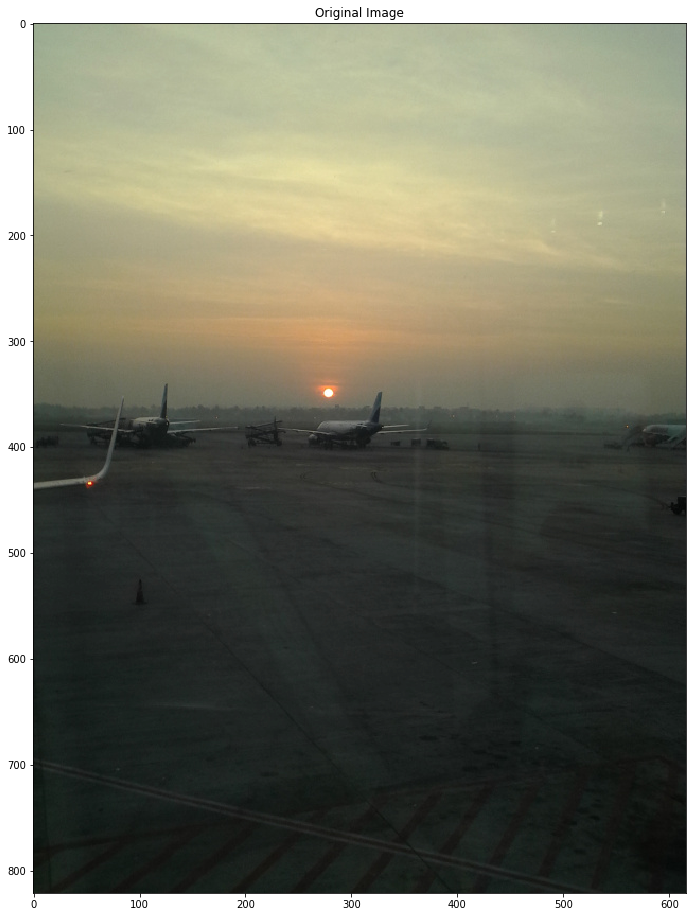

In [32]:
% matplotlib inline 

from skimage import data, draw
from skimage import transform, util
import numpy as np
from skimage import filters, color
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray


hl_color = np.array([0, 1, 0])

#img = data.rocket()
img = imread('../my images/aero.jpg')
print(img.shape)
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))

plt.figure(figsize=(20,16))
plt.title('Original Image')
plt.imshow(img)

(821, 416, 3)


C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


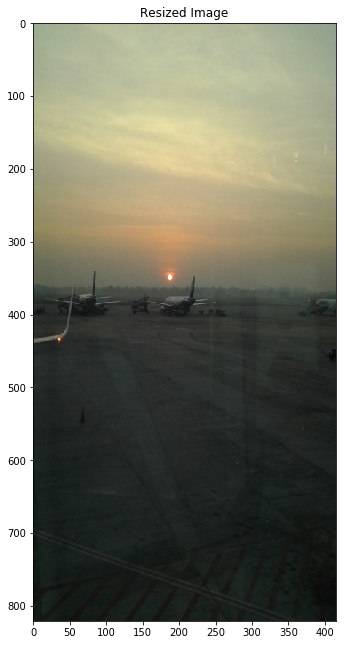

In [33]:
resized = transform.resize(img, (img.shape[0], img.shape[1] - 200), mode='reflect')
print(resized.shape)
plt.figure(figsize=(20,11))
plt.title('Resized Image')
plt.imshow(resized)

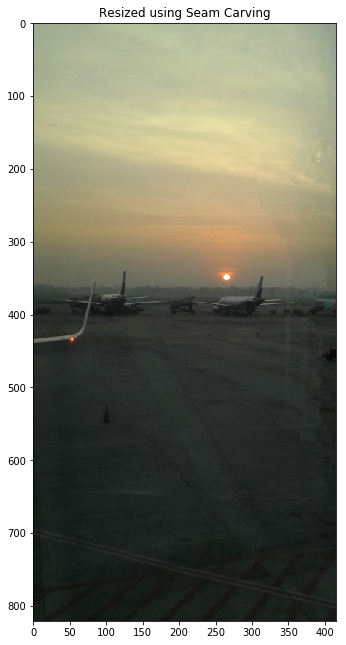

In [34]:
img = util.img_as_float(img)
eimg = filters.sobel(color.rgb2gray(img))
out = transform.seam_carve(img, eimg, 'vertical', 200)
plt.figure(figsize=(20,11))
plt.title('Resized using Seam Carving')
plt.imshow(out)

(720, 534, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x2241d49a320>,
 <matplotlib.text.Text at 0x2241d6d4e48>)

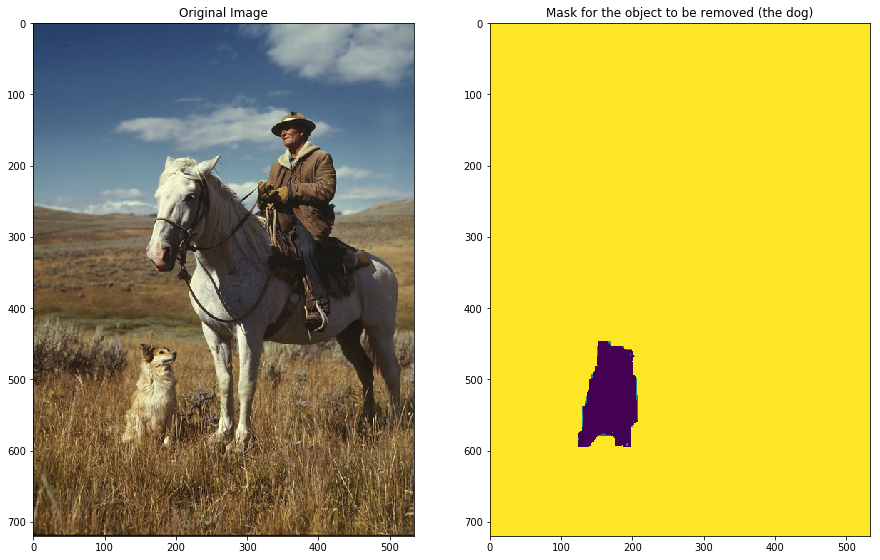

In [8]:
#from skimage import img_as_float
img = imread('man.jpg')
mask_img = rgb2gray(imread('man_mask.jpg'))
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(121), plt.imshow(img), plt.title('Original Image')
plt.subplot(122), plt.imshow(mask_img), plt.title('Mask for the object to be removed (the dog)')#, plt.colorbar()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


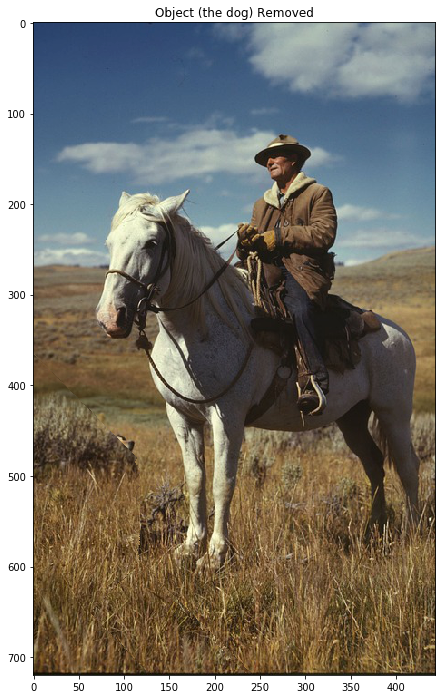

In [10]:
plt.figure(figsize=(10,12))
plt.title('Object (the dog) Removed')
out = transform.seam_carve(img, mask_img, 'vertical', 90)
resized = transform.resize(img, out.shape, mode='reflect')
plt.imshow(out)
plt.show()

In [11]:
# Standard imports
import cv2
import numpy as np 
 
# Read images
src = cv2.imread("birds.jpg")
dst = cv2.imread("sea.jpg")

# Create a rough mask around the airplane.
src_mask = cv2.imread("birds_mask.jpg") 
print(src.shape, dst.shape, src_mask.shape)


# This is where the CENTER of the airplane will be placed
center = (450,150)
 
# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE) #MIXED_CLONE) #NORMAL_CLONE)
 
# Save result
cv2.imwrite("sea_birds.jpg", output);

(480, 698, 3) (576, 768, 3) (480, 698, 3)


255 1.0 (220, 220, 3)


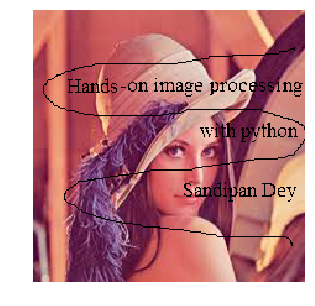

In [28]:
from skimage.io import imread, imsave
from skimage.color import rgb2gray
im = imread('../images/lena.jpg')
imm = rgb2gray(imread('../new images/lena_scratch_mask.jpg'))
print(np.max(im), np.max(imm), im.shape)
im[imm < 0.5] = 0
plt.figure(figsize=(5,5))
plt.imshow(im)
plt.axis('off')
plt.show()
#plt.savefig('../new images/lena_scratch.jpg', bbox_in='tight')
imsave('../new images/lena_scratch.jpg', im)

[0. 1.]


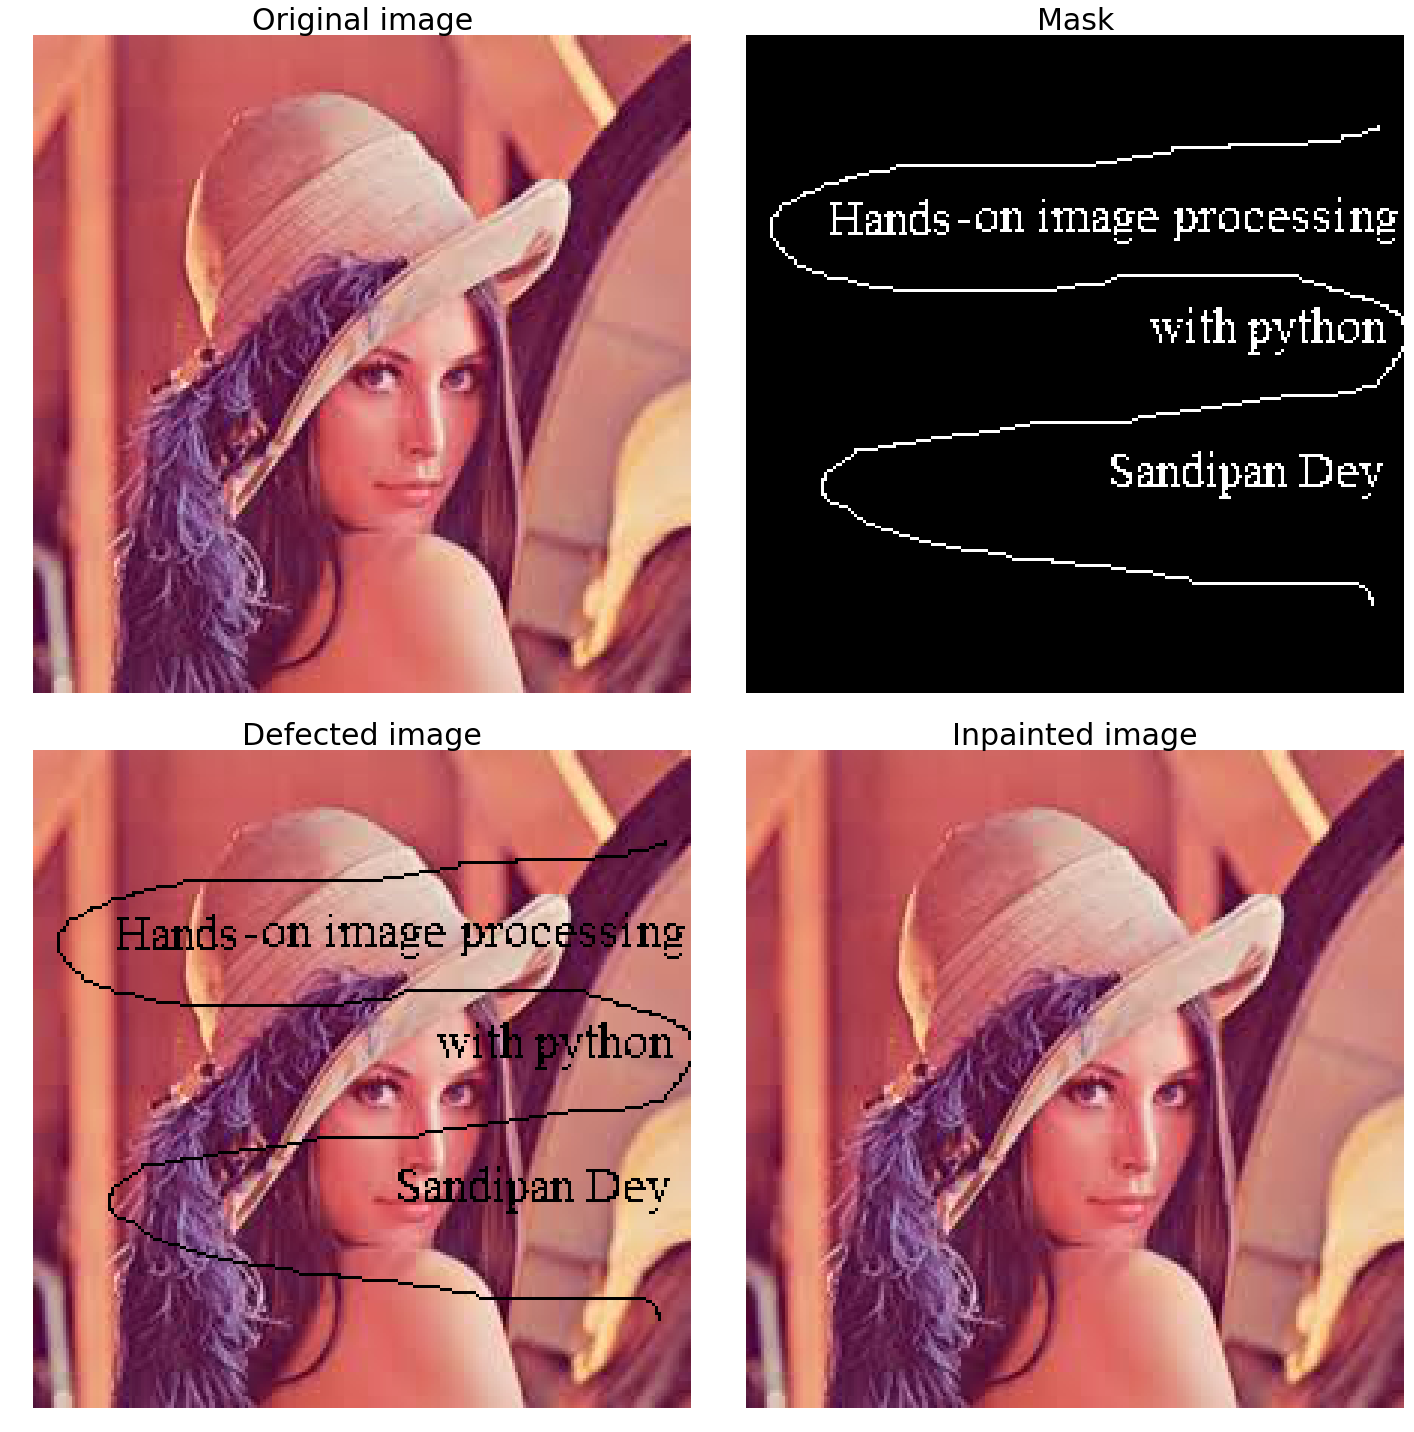

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_float
from skimage.restoration import inpaint

image_orig = img_as_float(imread('../new images/lena.jpg'))

# Create mask from a mask image
mask = rgb2gray(imread('../new images/lena_scratch_mask.jpg'))
mask[mask > 0.5] = 1
mask[mask <= 0.5] = 0
print(np.unique(mask))

# Defect image over the same region in each color channel
image_defect = image_orig.copy()
for layer in range(image_defect.shape[-1]):
    image_defect[np.where(mask)] = 0

image_result = inpaint.inpaint_biharmonic(image_defect, mask, multichannel=True)

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
ax = axes.ravel()

ax[0].set_title('Original image', size=30)
ax[0].imshow(image_orig)

ax[1].set_title('Mask', size=30)
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image', size=30)
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image', size=30)
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

In [37]:
from skimage.measure import compare_psnr
compare_psnr(image_orig, image_result)

43.91355215465254

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


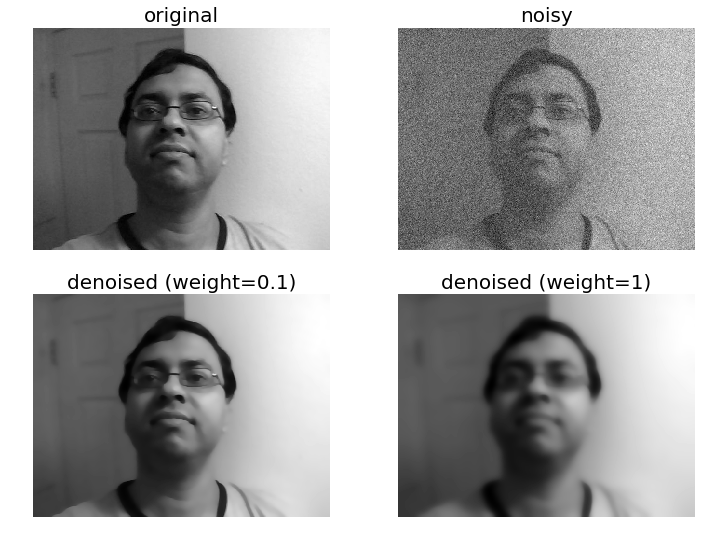

In [46]:
from skimage import io, color, data, img_as_float
from skimage.restoration import denoise_tv_chambolle
img = color.rgb2gray(io.imread('../my images/me12.jpg'))
plt.figure(figsize=(12,9))
noisy_img = img + 0.5 * img.std() * np.random.randn(*img.shape)
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(noisy_img), plt.axis('off'), plt.title('noisy', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.1) #, multichannel=True)
plt.subplot(223), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=0.1)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=1) #, multichannel=True)
plt.subplot(224), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=1)', size=20)
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\restoration\_denoise.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  g[slices_g] = np.diff(out, axis=ax)
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\skimage\restoration\_denoise.py:212: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  d[slices_d] += p[slices_p]


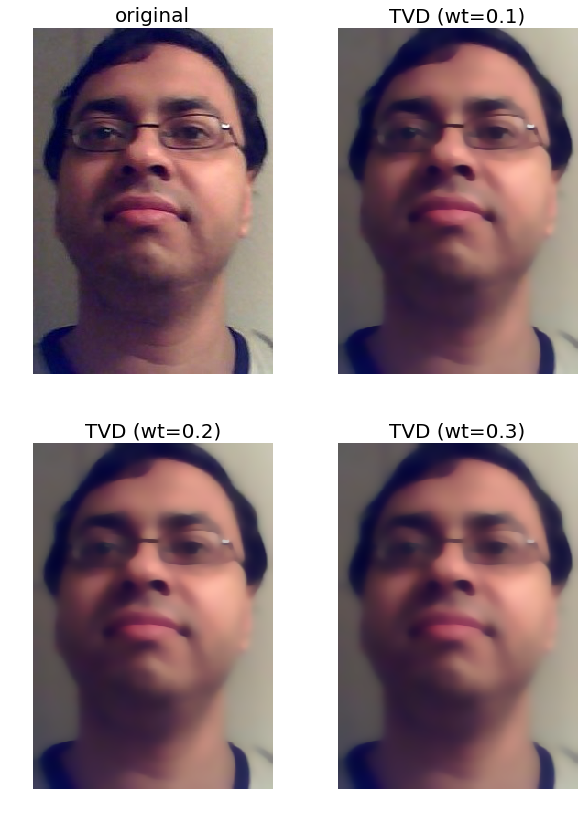

In [45]:
img = io.imread('../my images/me18.jpg')
plt.figure(figsize=(10,14))
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.1, multichannel=True)
plt.subplot(222), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.1)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.2, multichannel=True)
plt.subplot(223), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.2)', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.3, multichannel=True)
plt.subplot(224), plt.imshow(denoised_img), plt.axis('off'), plt.title('TVD (wt=0.3)', size=20)
plt.show()